### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/Whickham.txt')
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})

In [6]:
data.head()

,outcome,smoker,age
0,Alive,1,23
1,Alive,1,18
2,Dead,1,71
3,Alive,0,67
4,Alive,0,64


In [7]:
X = data[['smoker', 'age']]
y = data['outcome']

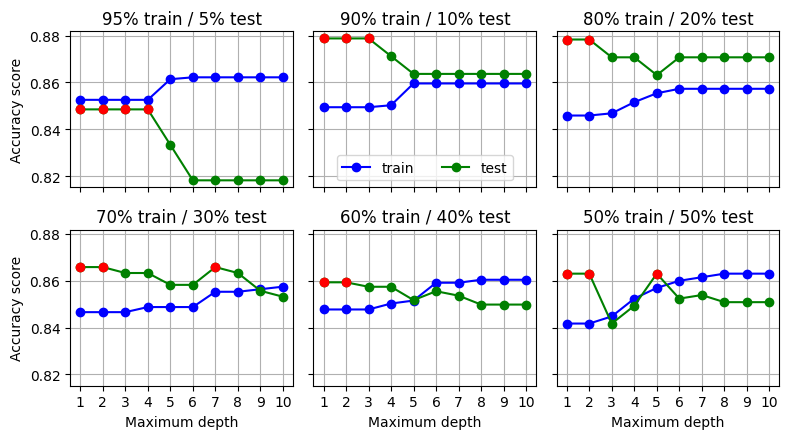

In [138]:
def getTestTrainAcc(X_train, y_train, X_test, y_test, depth):
    dtree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    train_acc = dtree.score(X_train, y_train)
    test_acc = dtree.score(X_test, y_test)
    return train_acc, test_acc

f, axl = plt.subplots(2, 3, figsize=(8.0, 4.5), sharex=True, sharey=True)
axl = axl.flatten()

depths = range(1, 11)

axl[0].set_xticks(depths)
axl[0].grid(True)

for i, test_split in enumerate([0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):

    train_acc_list = []
    test_acc_list = []

    for depth in depths:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, stratify=y, random_state=2)
        train_acc, test_acc = getTestTrainAcc(X_train, y_train, X_test, y_test, depth)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    df = pd.DataFrame(
             {"train_acc": train_acc_list, "test_acc": test_acc_list},
             index = range(1, len(test_acc_list)+1)
    )

    x = 100*test_split
    ax = axl[i]

    max_value = df.test_acc.max()
    
    max_values = df[df.test_acc == max_value].test_acc.values
    max_idxs = df[df.test_acc == max_value].index.values

    ax.plot(df.index, df.train_acc, c='b', marker='o', label='train')
    ax.plot(df.index, df.test_acc, c='g', marker='o', label='test')
    ax.scatter(max_idxs, max_values, c='r', zorder=5)

    ax.set_title(f"{100-x:.0f}% train / {x:.0f}% test")

    ax.grid(True)

axl[1].legend(ncols=2, loc='lower center')
axl[0].set_ylabel('Accuracy score')
axl[3].set_ylabel('Accuracy score')
axl[3].set_xlabel('Maximum depth')
axl[4].set_xlabel('Maximum depth')
axl[5].set_xlabel('Maximum depth')
plt.tight_layout()
plt.savefig('try_14.1-errors.png')
plt.show()

    # df.plot(title=, ax=ax)
    # plt.xticks(range(1,11))
    # plt.title
    # plt.legend()
    # plt.grid()
    # plt.show()

In [131]:

max_value = df.test_acc.max()

max_values = df[df.test_acc == max_value].test_acc.values
max_idxs = df[df.test_acc == max_value].index.values

print(max_idxs)
print(max_values)

[1 2 3 4]
[0.84848485 0.84848485 0.84848485 0.84848485]


In [125]:
df[df.test_acc == df.test_acc.max()]

,train_acc,test_acc
1,0.841705,0.863014
2,0.841705,0.863014
5,0.856925,0.863014


In [140]:
# import numpy as np
import math

p0 = 0.31
p1 = 0.33
p2 = 0.36
p = [p0, p1, p2]
print(sum([-x*math.log2(x) for x in p]))

1.5822322736472711


In [141]:
print(sum([-x*math.log2(x) for x in [0.5,0.5]]))

1.0
